# Machine Learning Models


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import normalize, StandardScaler

In [2]:
df_train = pd.read_csv("dataset/output/train.csv")
df_test = pd.read_csv("dataset/output/test.csv")

In [3]:
# split into X_train, y_train, X_test, y_test
X_train = df_train.drop(columns=["target"])
y_train = df_train["target"]
X_test = df_test.drop(columns=["target"])
y_test = df_test["target"]

# normalize data
X_train = normalize(X_train)
X_test = normalize(X_test)

In [4]:
# helper function to draw learning curve in sns plot
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    ylim=None,
    cv=None,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    plt.figure(figsize=(5, 3))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-",
             color="r", label="Training score")
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")
    plt.show()

## Support Vector Machine (SVM)


Accuracy:  0.6726137377341659
Confusion Matrix: 
 [[1352   94]
 [ 640  156]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.93      0.79      1446
           1       0.62      0.20      0.30       796

    accuracy                           0.67      2242
   macro avg       0.65      0.57      0.54      2242
weighted avg       0.66      0.67      0.61      2242



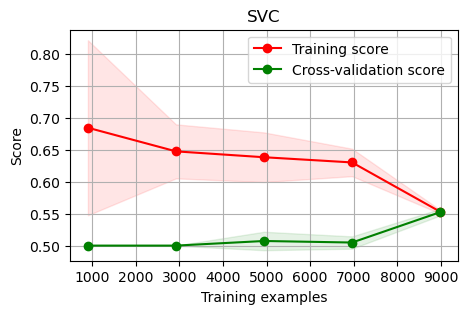

In [5]:
model = SVC(kernel="rbf", random_state=0)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

plot_learning_curve(model, "SVC", X_train, y_train, cv=5)

## Decision Tree


Accuracy:  0.42863514719000895
Confusion Matrix: 
 [[757 689]
 [592 204]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.52      0.54      1446
           1       0.23      0.26      0.24       796

    accuracy                           0.43      2242
   macro avg       0.39      0.39      0.39      2242
weighted avg       0.44      0.43      0.44      2242



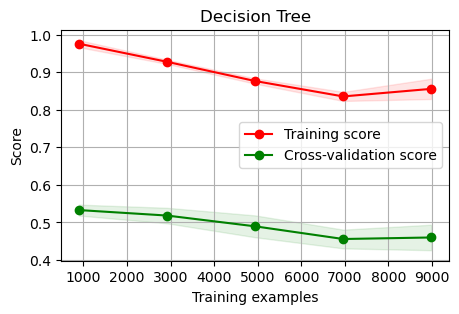

In [6]:
model = DecisionTreeClassifier(
    criterion="entropy", splitter="best", random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

plot_learning_curve(model, "Decision Tree", X_train, y_train, cv=5)

## Logistic Regression


Accuracy: 0.6115075825156111
Confusion Matrix: 
 [[1092  354]
 [ 517  279]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.76      0.71      1446
           1       0.44      0.35      0.39       796

    accuracy                           0.61      2242
   macro avg       0.56      0.55      0.55      2242
weighted avg       0.59      0.61      0.60      2242



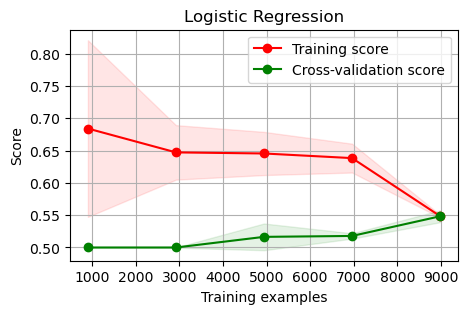

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

plot_learning_curve(model, "Logistic Regression", X_train, y_train, cv=5)

## Random Forest


Accuracy: 0.6900089206066012
Confusion Matrix: 
 [[1258  188]
 [ 507  289]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.87      0.78      1446
           1       0.61      0.36      0.45       796

    accuracy                           0.69      2242
   macro avg       0.66      0.62      0.62      2242
weighted avg       0.67      0.69      0.67      2242



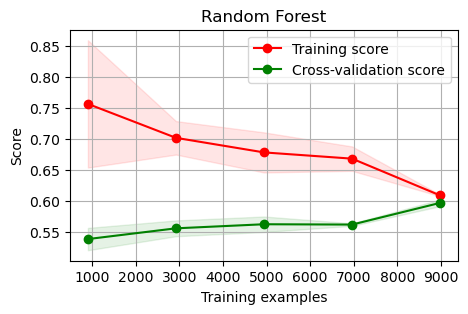

In [8]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

plot_learning_curve(model, "Random Forest", X_train, y_train, cv=5)

## AdaBoost


Accuracy: 0.6226583407671722
Confusion Matrix: 
 [[998 448]
 [398 398]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      1446
           1       0.47      0.50      0.48       796

    accuracy                           0.62      2242
   macro avg       0.59      0.60      0.59      2242
weighted avg       0.63      0.62      0.63      2242



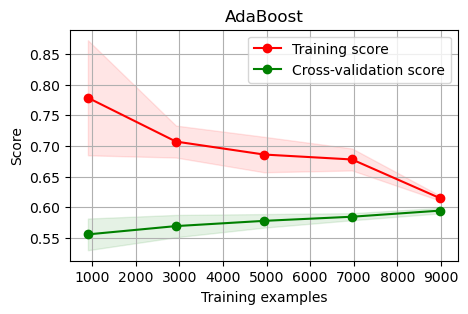

In [9]:
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

plot_learning_curve(model, "AdaBoost", X_train, y_train, cv=5)

## GradientBoosting


Accuracy: 0.6391614629794826
Confusion Matrix: 
 [[1054  392]
 [ 417  379]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72      1446
           1       0.49      0.48      0.48       796

    accuracy                           0.64      2242
   macro avg       0.60      0.60      0.60      2242
weighted avg       0.64      0.64      0.64      2242



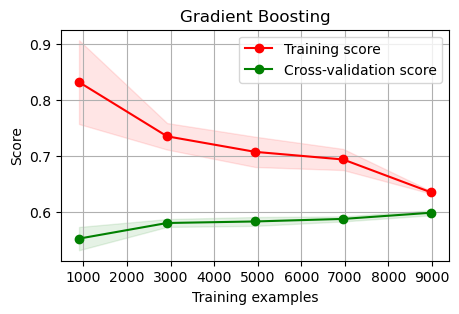

In [10]:
from sklearn.metrics import roc_auc_score

model = GradientBoostingClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

plot_learning_curve(model, "Gradient Boosting", X_train, y_train, cv=5)